In [7]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import pack_vis_sol
import matplotlib.pyplot as plt
importlib.reload(kgs)
#pack_vis.plot_polygons([kgs.center_tree] + kgs.convex_breakdown)

local


<module 'kaggle_support' from '/mnt/d/packing/code/analysis/../core/kaggle_support.py'>

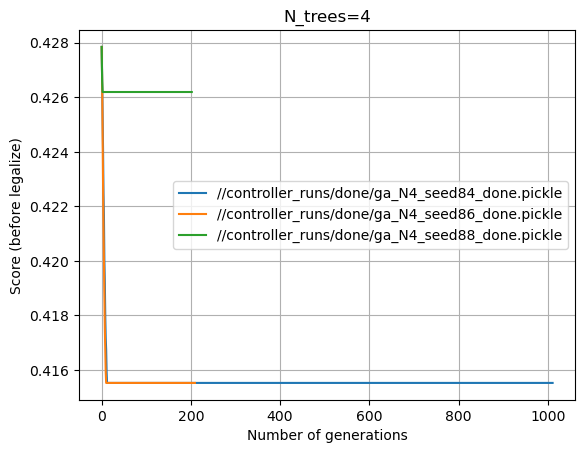

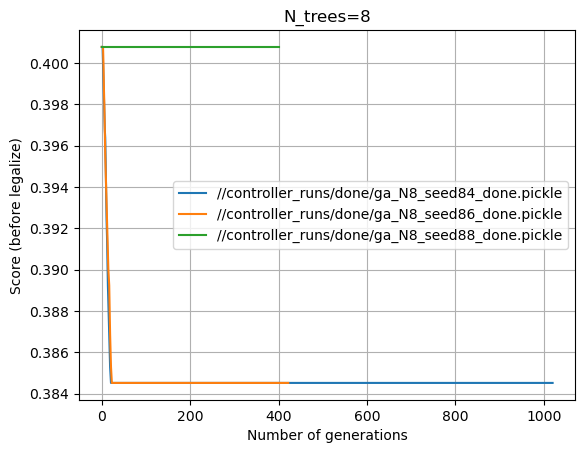

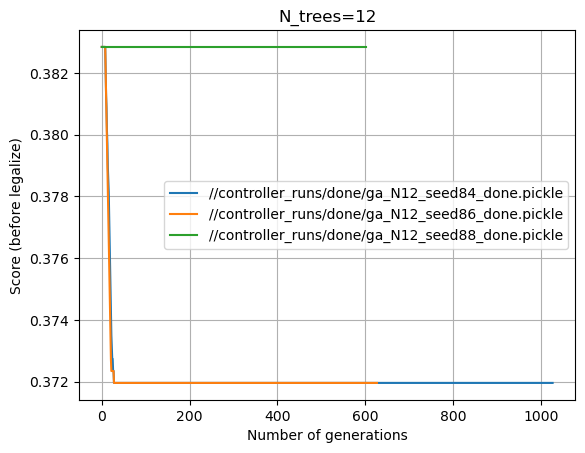

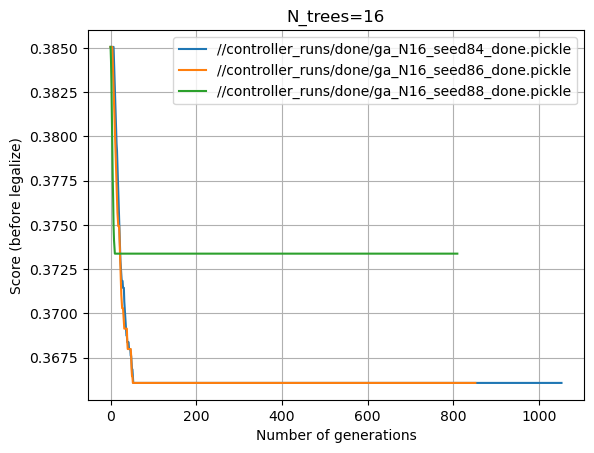

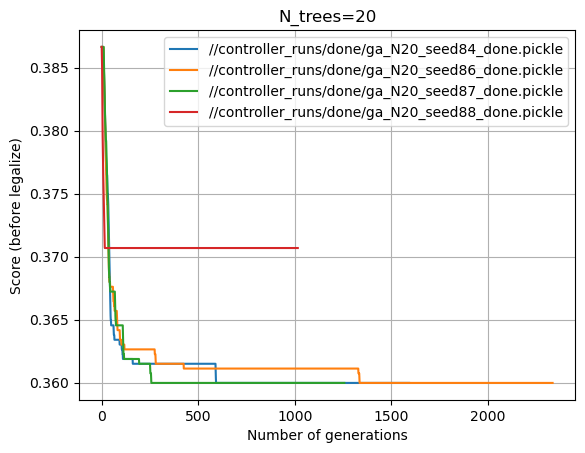

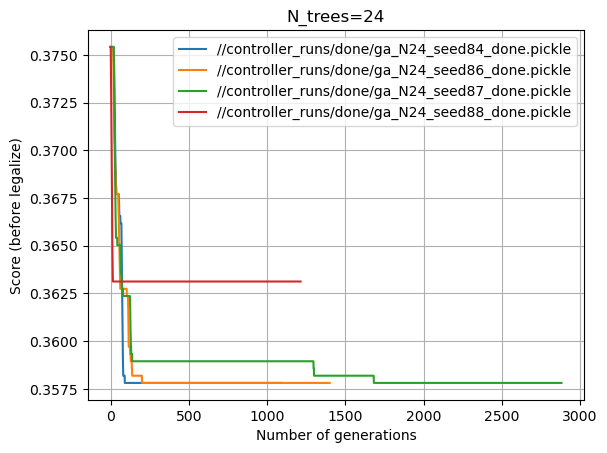

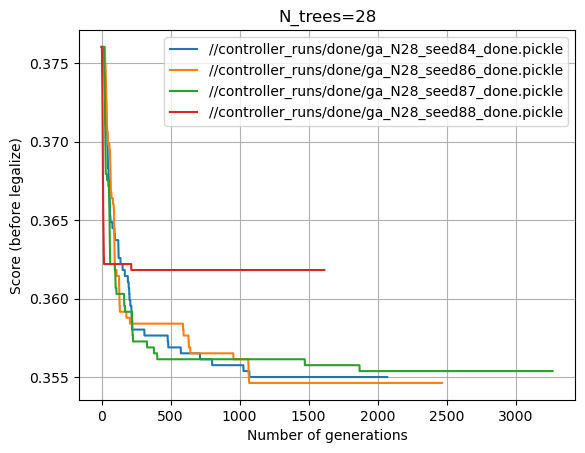

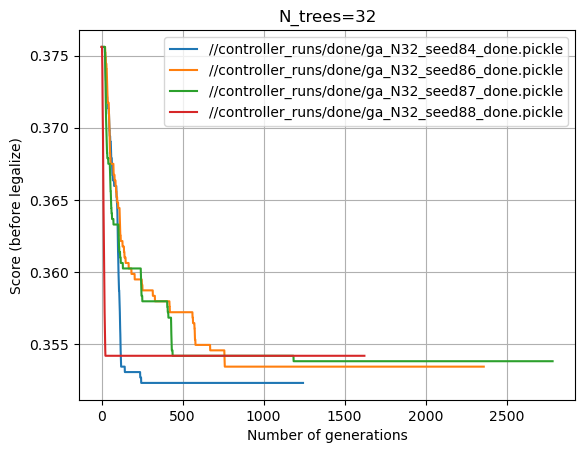

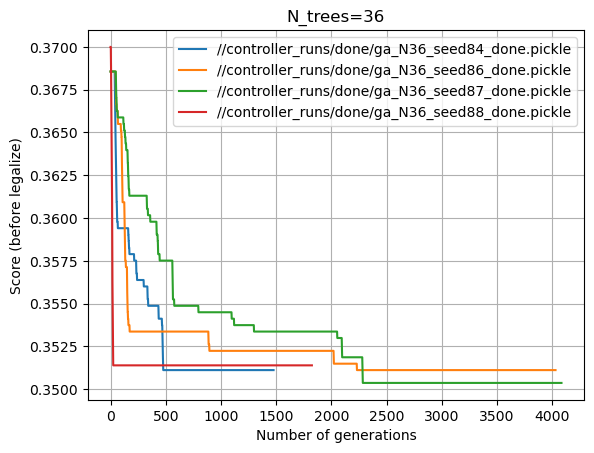

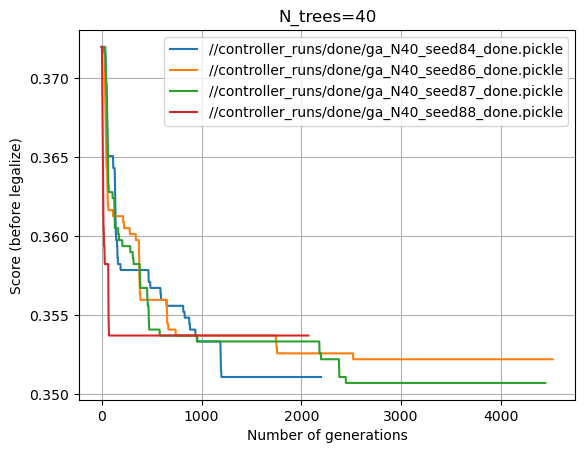

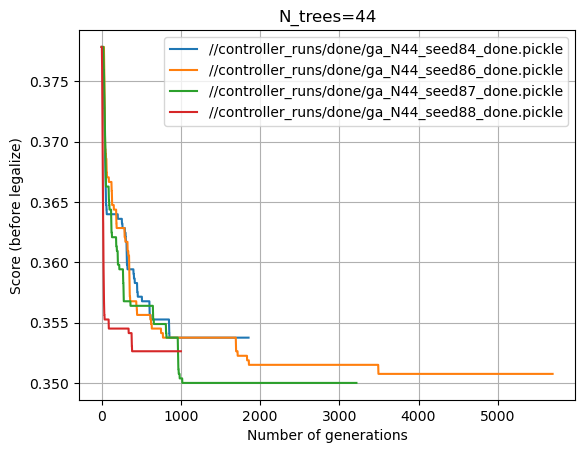

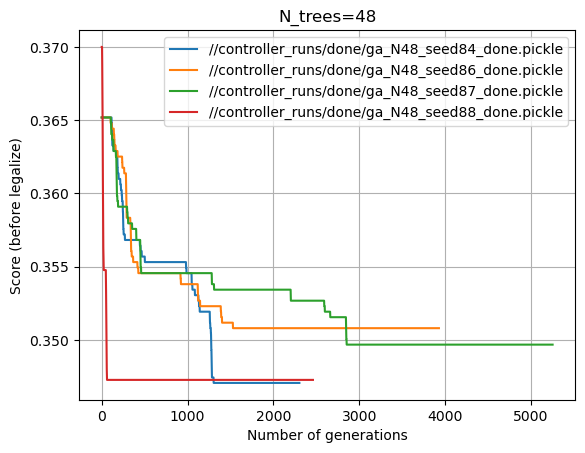

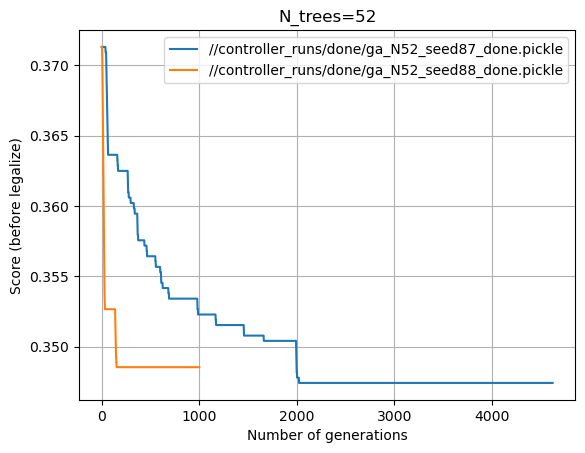

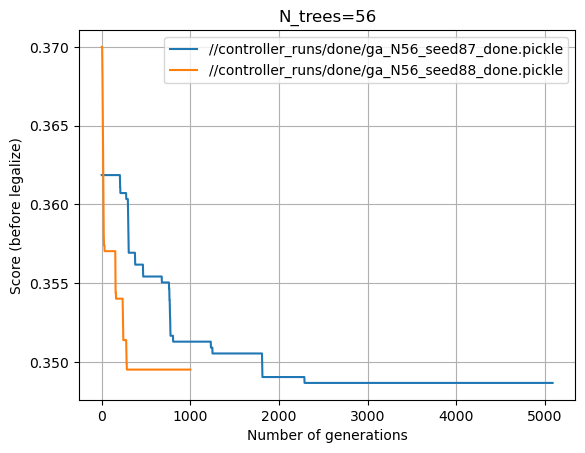

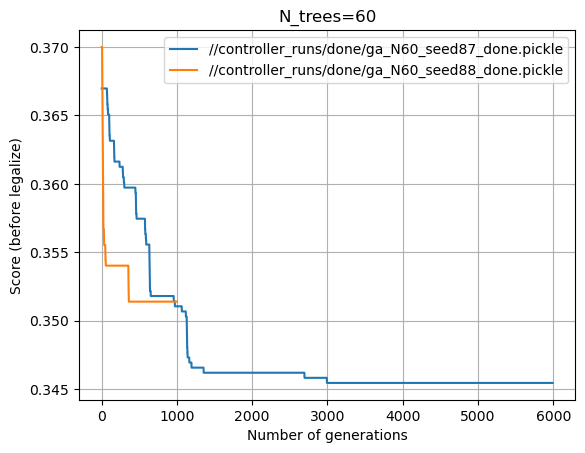

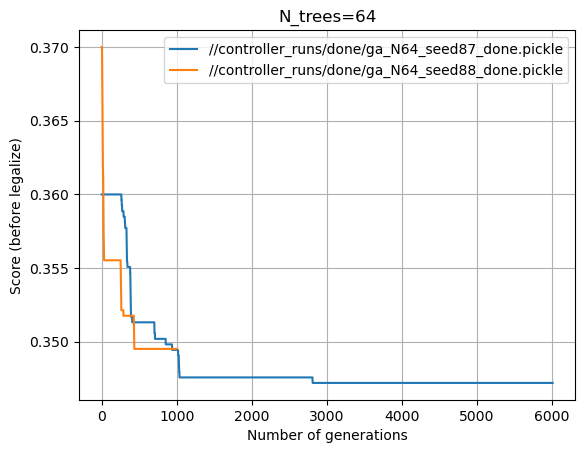

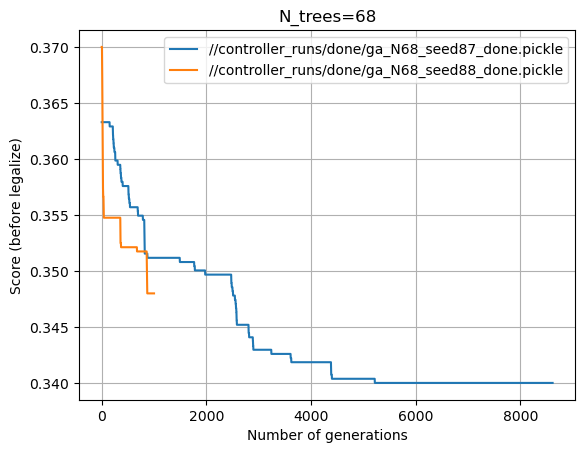

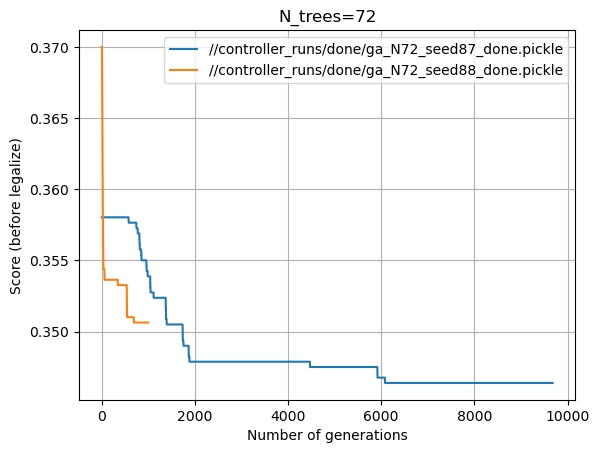

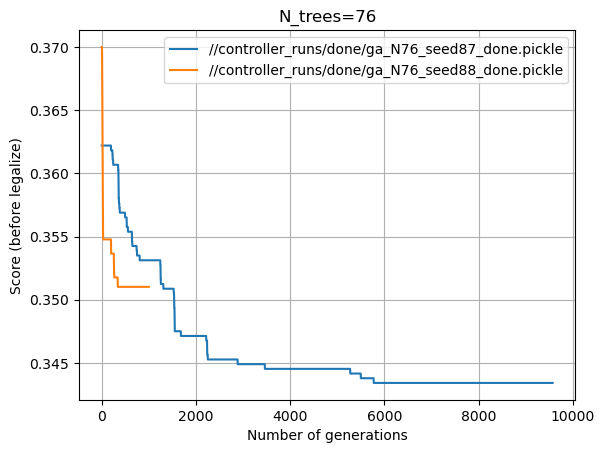

In [8]:
import numpy as np
import glob
for N_trees in np.arange(4,201,4):
    files = glob.glob(kgs.temp_dir + f'/controller_runs/done/ga_N{N_trees}_*.pickle')
    #print(N_trees,files)
    if len(files)>1:
        plt.figure()
        for f in files:
            dat = kgs.dill_load(f)
            plt.plot([x[0] for x in dat.ga.best_costs_per_generation[0]], label=f[20:])
        plt.title(f'N_trees={N_trees}')
        plt.legend()
        plt.xlabel('Number of generations')
        plt.ylabel('Score (before legalize)')
        plt.grid()

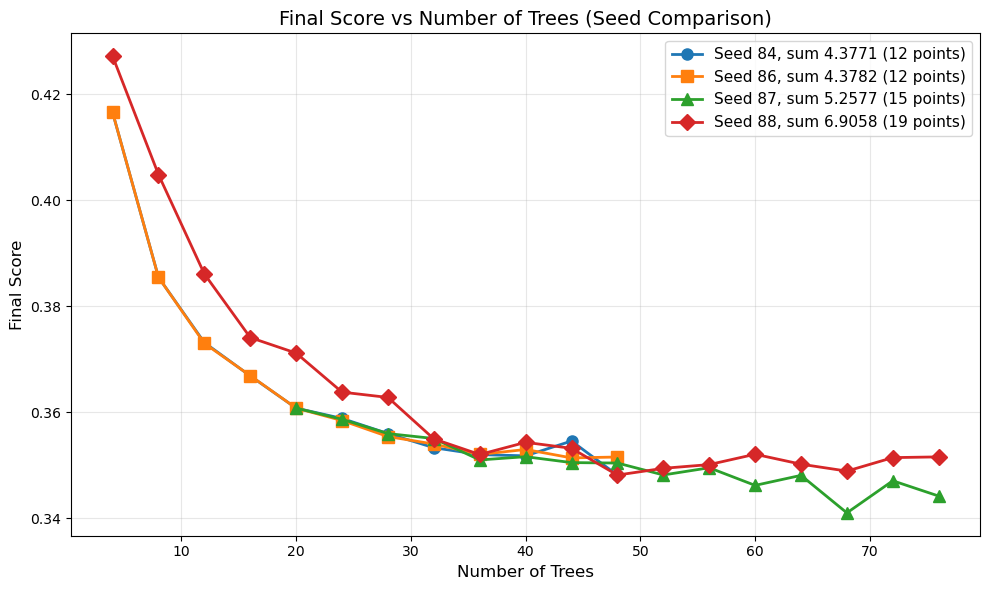

Plotted 19 total N_trees values: [np.int64(4), np.int64(8), np.int64(12), np.int64(16), np.int64(20), np.int64(24), np.int64(28), np.int64(32), np.int64(36), np.int64(40), np.int64(44), np.int64(48), np.int64(52), np.int64(56), np.int64(60), np.int64(64), np.int64(68), np.int64(72), np.int64(76)]
  Seed 84: 12 data points
  Seed 86: 12 data points
  Seed 87: 15 data points
  Seed 88: 19 data points


[np.float64(0.42719075083732605),
 np.float64(0.40484023094177246),
 np.float64(0.38607557614644367),
 np.float64(0.3740713894367218),
 np.float64(0.3711383819580078),
 np.float64(0.36376750469207764),
 np.float64(0.362764699118478),
 np.float64(0.35493800044059753),
 np.float64(0.3519967132144504),
 np.float64(0.35429134368896487),
 np.float64(0.3531564582477916),
 np.float64(0.34811151027679443),
 np.float64(0.3493856650132399),
 np.float64(0.3500894478389195),
 np.float64(0.352041498819987),
 np.float64(0.35016605257987976),
 np.float64(0.34885866501752066),
 np.float64(0.3514068126678467),
 np.float64(0.35154297477320623)]

In [9]:
# Compare final scores across multiple seeds
SEEDS_TO_DO = [84, 86, 87, 88]

import numpy as np
import glob
import matplotlib.pyplot as plt
import re

# Collect final scores for each seed
seed_scores = {seed: {} for seed in SEEDS_TO_DO}

for N_trees in np.arange(4,201,4):
    files = glob.glob(kgs.temp_dir + f'/*runs/done/ga_N{N_trees}_*.pickle')
    
    for f in files:
        # Extract seed from filename
        seed = None
        for s in SEEDS_TO_DO:
            if f'seed{s}' in f or f'_{s}' in f or f's{s}' in f:
                seed = s
                break
        
        if seed is None:
            # Try to parse seed from filename more generically
            seed_match = re.search(r'seed(\d+)|s(\d+)|_(\d+)(?!.*N\d)', f)
            if seed_match:
                parsed_seed = int(seed_match.group(1) or seed_match.group(2) or seed_match.group(3))
                if parsed_seed in SEEDS_TO_DO:
                    seed = parsed_seed
        
        if seed is not None:
            # Load data and get final score
            dat = kgs.dill_load(f)
            final_score = dat.ga.champions[0].phenotype.h[0,0].get()**2/N_trees  # Last generation's best cost
            seed_scores[seed][N_trees] = final_score

# Collect all N_trees values across all seeds
all_N_trees = set()
for seed in SEEDS_TO_DO:
    all_N_trees.update(seed_scores[seed].keys())
all_N_trees = sorted(all_N_trees)

if all_N_trees:
    # Create plot
    plt.figure(figsize=(10, 6))
    markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']
    
    for i, seed in enumerate(SEEDS_TO_DO):
        # Get values for this seed (None for missing data)
        n_trees_list = []
        values = []
        for n in all_N_trees:
            if n in seed_scores[seed]:
                n_trees_list.append(n)
                values.append(seed_scores[seed][n])
        
        if values:  # Only plot if there's at least one value
            marker = markers[i % len(markers)]
            plt.plot(n_trees_list, values, marker=marker, linestyle='-', 
                    label=f'Seed {seed}, sum {np.sum(values):.4f} ({len(values)} points)', 
                    linewidth=2, markersize=8)
    
    plt.xlabel('Number of Trees', fontsize=12)
    plt.ylabel('Final Score', fontsize=12)
    plt.title('Final Score vs Number of Trees (Seed Comparison)', fontsize=14)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"Plotted {len(all_N_trees)} total N_trees values: {all_N_trees}")
    for seed in SEEDS_TO_DO:
        print(f"  Seed {seed}: {len(seed_scores[seed])} data points")
else:
    print("No N_trees values found")

values

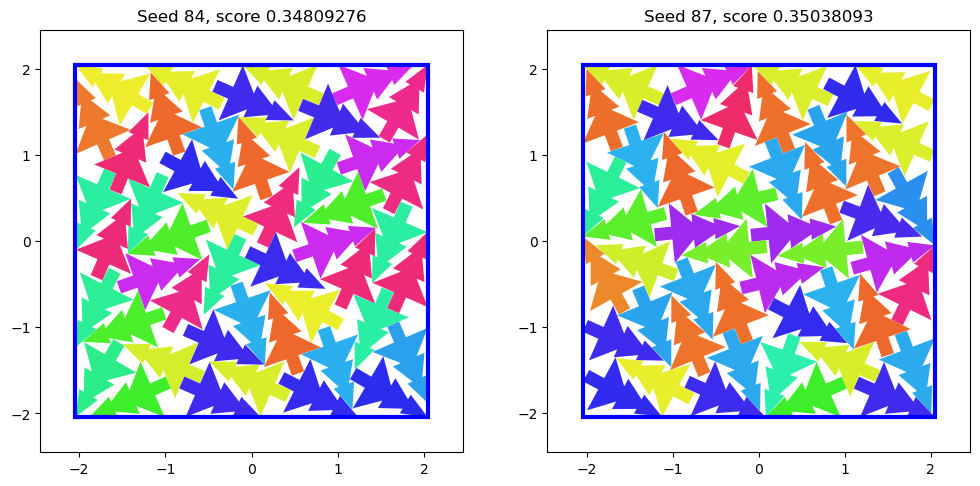

In [10]:
seeds = [84,87]
N_trees = 48
res = []
for s in seeds:
    f = kgs.temp_dir + f'/controller_runs/done/ga_N{N_trees}_seed{s}_done.pickle'
    dat = kgs.dill_load(f)
    res.append(dat.ga.champions[0])
_,ax = plt.subplots(1,2, figsize=(12,6))
for i,r in enumerate(res):
    plt.sca(ax[i])
    pack_vis_sol.pack_vis_sol(r.phenotype, ax=ax[i])
    plt.title(f'Seed {seeds[i]}, score {r.phenotype.h[0,0].get()**2/N_trees:.8f}')

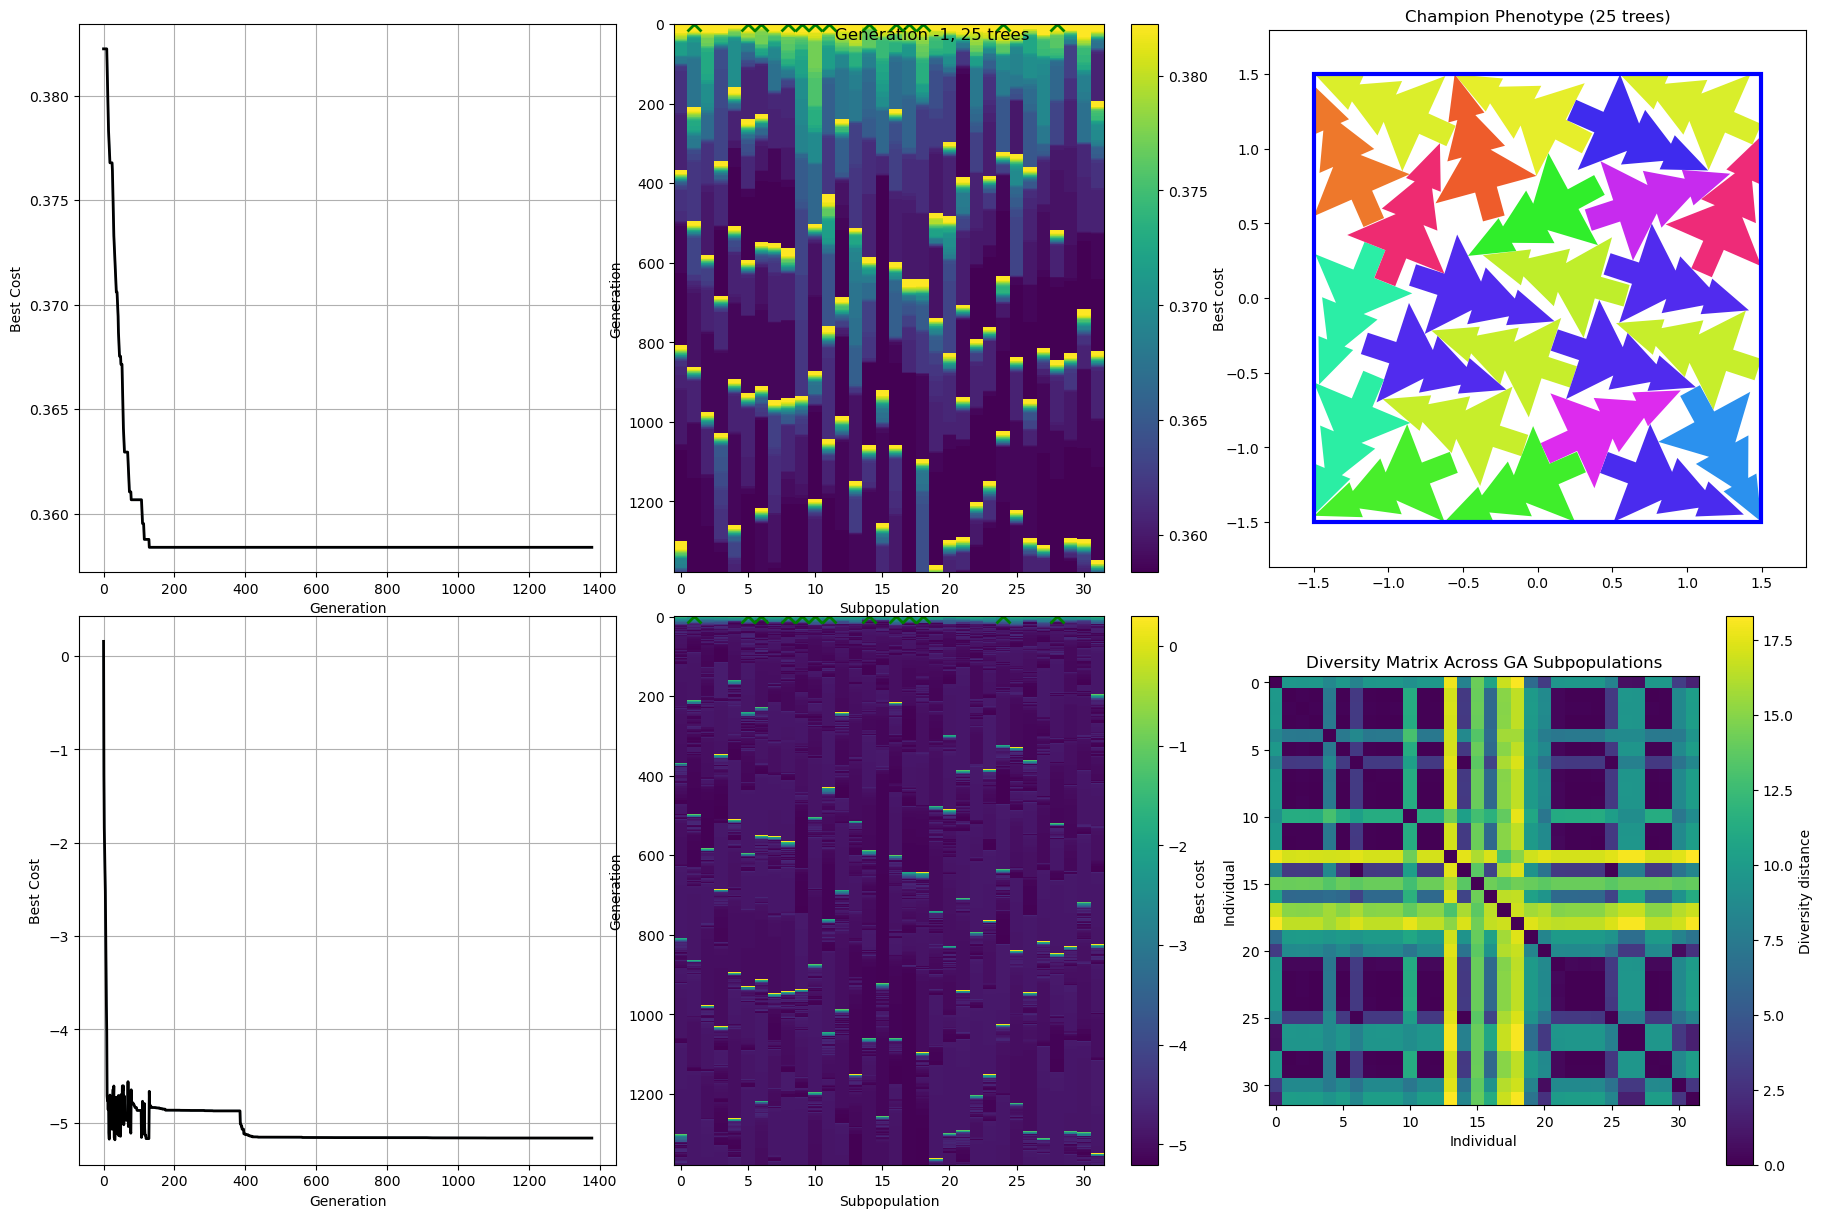

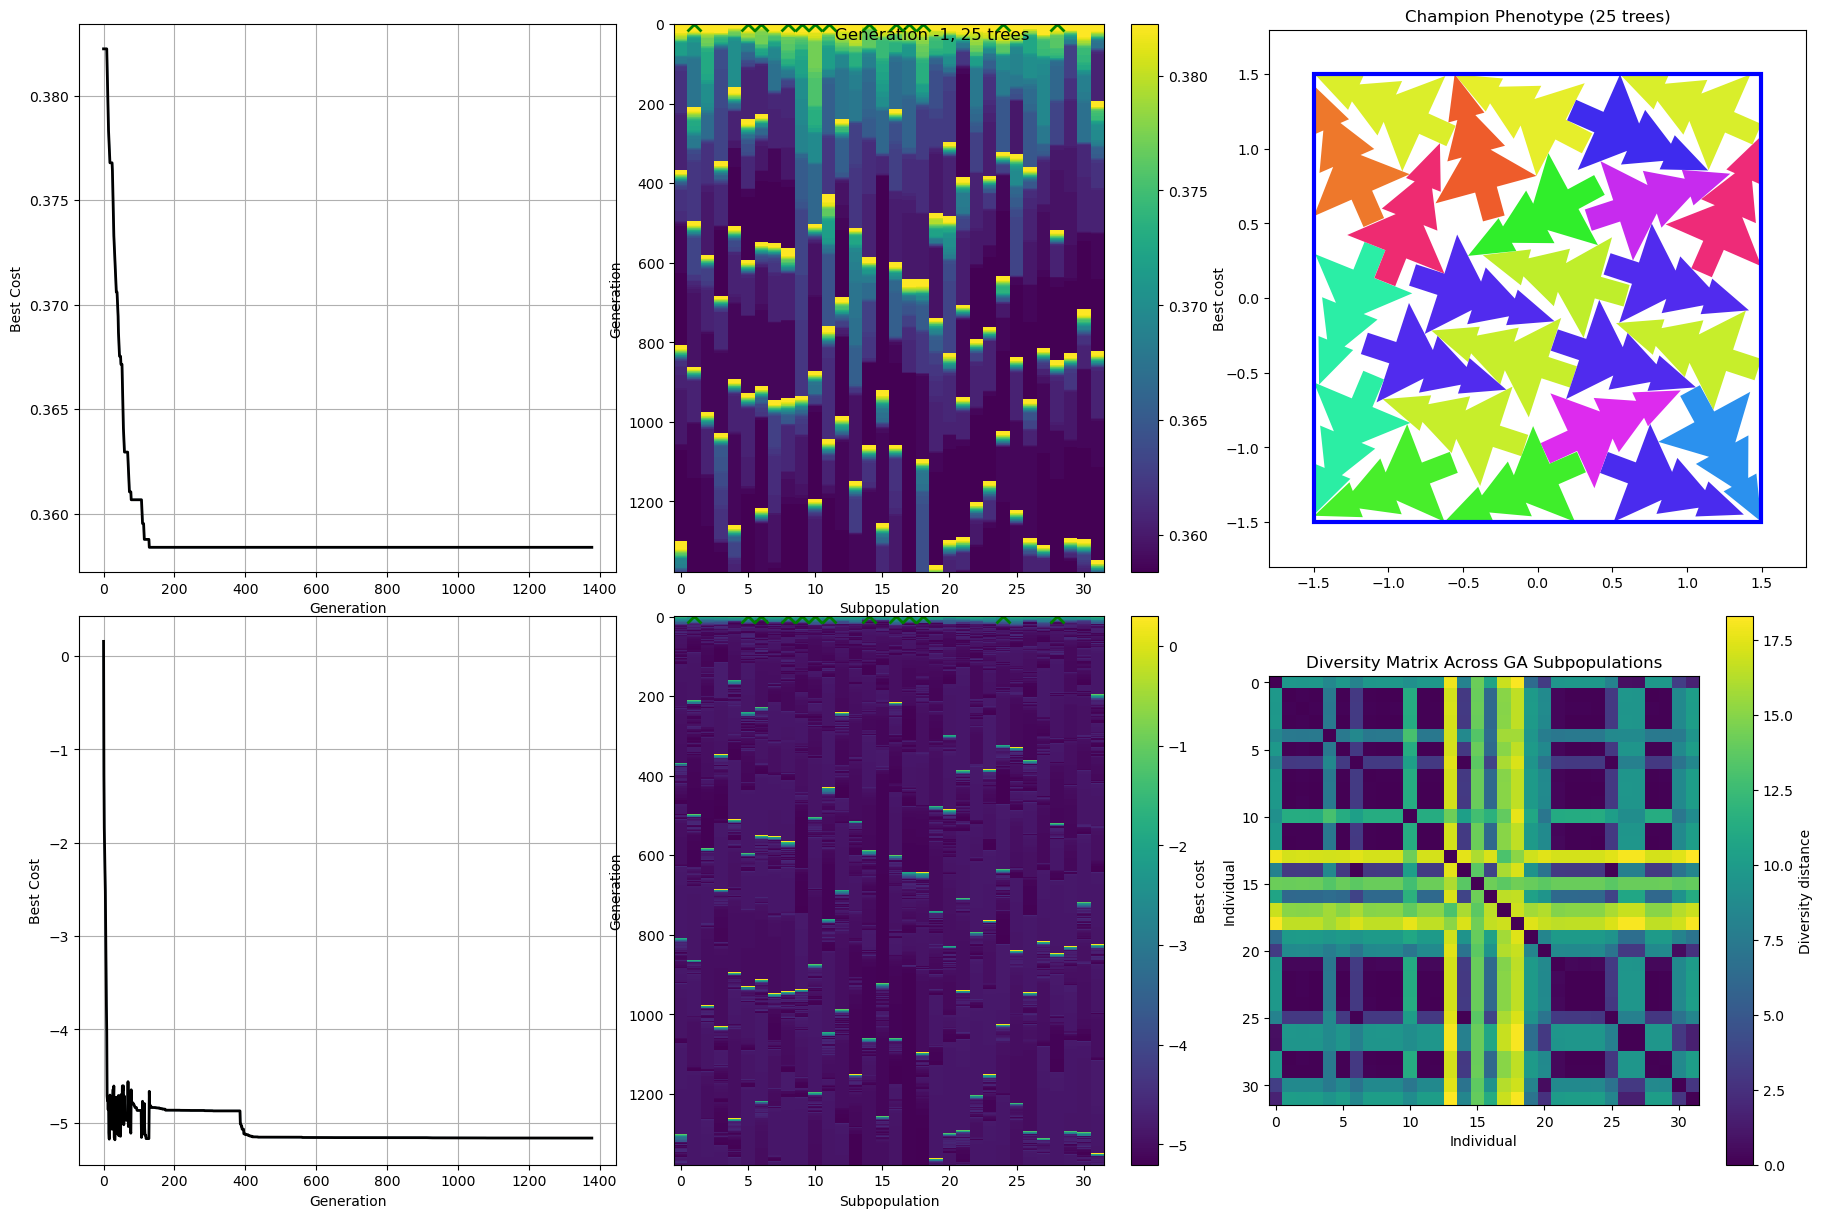

In [11]:
dat = kgs.dill_load(kgs.temp_dir + f'/controller_runs/done/ga_N25_seed87_done.pickle')
dat.ga.diagnostic_plots(-1,None)

In [12]:
2

2